In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.random_forest import RandomForest
from models.rnn import HistoneRNN
from models.svm import SVM

In [2]:
models = [SVM(), RandomForest(), HistoneRNN(loss='mean_squared_error', verbose=0), HistoneRNN(loss='huber_loss', verbose=0)]
model_names = ['SVM', 'Random Forest', 'RNN with MSE loss', 'RNN with Huber loss']
means = []
stds = []

for model in models:
    cv_scores = model.cross_validate()
    means.append(cv_scores.mean())
    stds.append(cv_scores.std())

Metal device set to: Apple M1 Pro
Cross-validate SVM model


100%|██████████| 5/5 [13:08<00:00, 157.67s/it]


Mean val score 0.733, scores: [0.7334547172894468, 0.7334754814736182, 0.7311040616462987, 0.7298910411933067, 0.7393181499337969]
Cross-validate RandomForest model


100%|██████████| 5/5 [00:43<00:00,  8.79s/it]


Mean val score 0.753, scores: [0.7508993694208682, 0.7531013790582725, 0.7578037907746158, 0.7427602729904297, 0.7621108527420658]
Cross-validate HistoneRNN model


100%|██████████| 5/5 [13:30<00:00, 162.14s/it]


Mean val score 0.786, scores: [0.7921158181378823, 0.7862534354022174, 0.7810454496059015, 0.7877072915592976, 0.7842715910120542]
Cross-validate HistoneRNN model


100%|██████████| 5/5 [12:01<00:00, 144.21s/it]

Mean val score 0.806, scores: [0.7999178459515828, 0.8036204180202007, 0.8073322720621832, 0.8045606846311757, 0.8157606553070851]


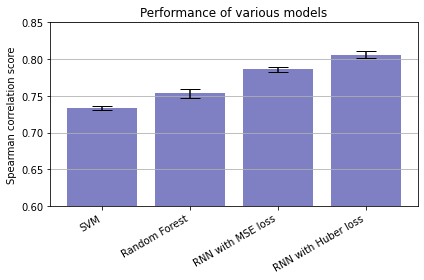

In [6]:
x_pos = np.arange(len(models))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', color='darkblue', capsize=10)
ax.set_ylabel('Spearman correlation score')
ax.set_xticks(x_pos)
ax.set_ylim(0.6, 0.85)
ax.set_xticklabels(model_names)
ax.set_title('Performance of models (cross-validation)')
ax.yaxis.grid(True)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()